In [31]:
import numpy as np
import pandas as pd
import sklearn.metrics
import statsmodels.api as sm
import seaborn as sns

In [32]:
sample_sub = pd.read_csv("sample_submission.csv")

In [33]:
test, original_train = pd.read_csv('test.csv'), pd.read_csv('train.csv')

In [34]:
original_train.shape[0]

1117957

In [35]:
original_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


FEATURES

In [36]:
original_train.columns.tolist()

['id',
 'MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors',
 'FloodProbability']

In [37]:
original_train['RiverManagement'].value_counts()

RiverManagement
5     218216
4     214079
6     167368
3     160049
7     108538
2      83782
8      71204
9      36232
1      28872
10     15170
11      5773
0       5407
12      2120
13       715
14       297
15        92
16        43
Name: count, dtype: int64

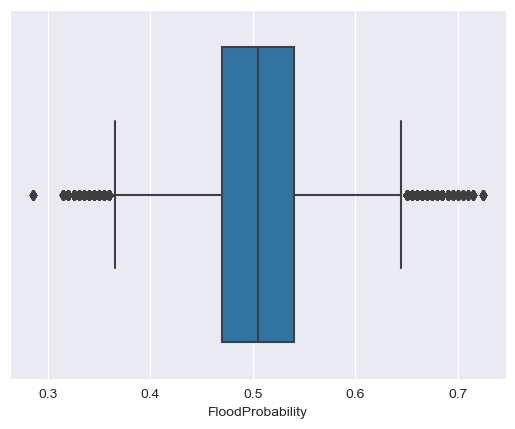

In [38]:
sns.boxplot(original_train, x='FloodProbability');

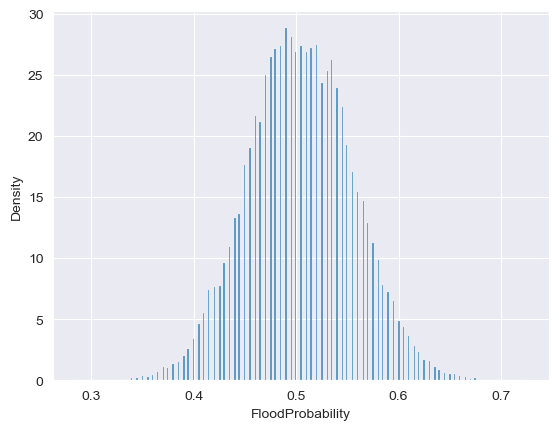

In [39]:
sns.histplot(original_train, x='FloodProbability', stat='density');

In [40]:
len(original_train['PoliticalFactors'].unique())

17

In [41]:
sample = original_train.sample(frac=.1)
sample.shape[0]

111796

In [42]:
original_train.columns.tolist()

['id',
 'MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors',
 'FloodProbability']

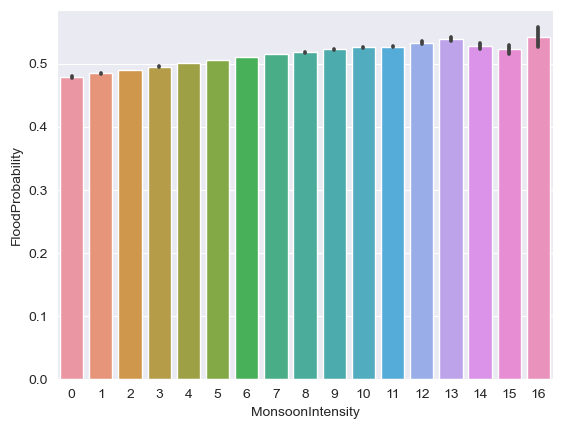

In [43]:
sns.barplot(data=original_train, x = 'MonsoonIntensity', y='FloodProbability');

<Axes: >

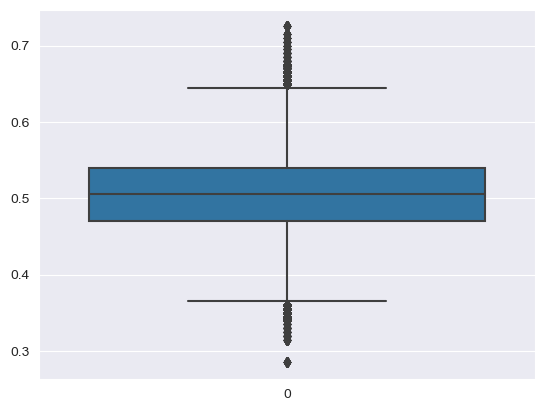

In [44]:
sns.boxplot(original_train['FloodProbability'])

<Axes: >

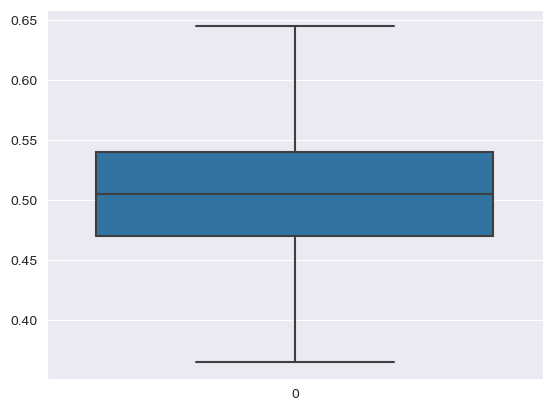

In [45]:
def outlier_handler_IQR(ser): 
    Q1 = np.quantile(ser, .25)
    Q3 = np.quantile(ser, .75)
    IQR = Q3 - Q1

    return ser.loc[(ser > Q1 - (1.5 * IQR)) & (ser < Q3 + (1.5 * IQR))]

sns.boxplot(outlier_handler_IQR(original_train['FloodProbability']))

<Axes: >

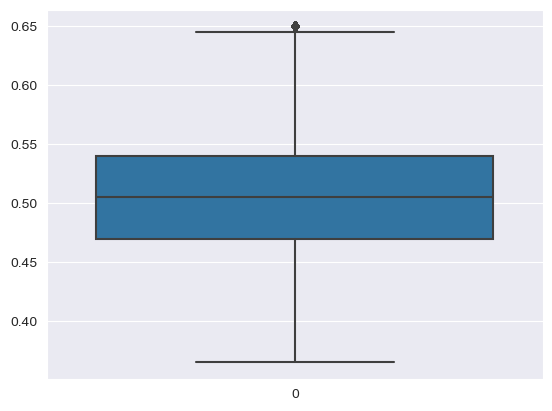

In [46]:
from scipy.stats.mstats import winsorize

def outlier_handler_winsor(ser):
    return winsorize(ser, (.0025, .0025))


sns.boxplot(outlier_handler_winsor(original_train['FloodProbability']))

<Axes: ylabel='Count'>

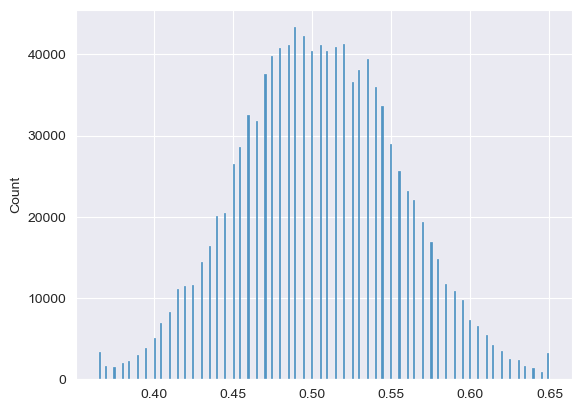

In [47]:
sns.histplot(outlier_handler_winsor(original_train['FloodProbability']))

In [48]:
original_train_outlier = original_train
#original_train_outlier = original_train.apply(outlier_handler_winsor)

CLEANING

In [49]:
original_train_outlier.isna().any()

id                                 False
MonsoonIntensity                   False
TopographyDrainage                 False
RiverManagement                    False
Deforestation                      False
Urbanization                       False
ClimateChange                      False
DamsQuality                        False
Siltation                          False
AgriculturalPractices              False
Encroachments                      False
IneffectiveDisasterPreparedness    False
DrainageSystems                    False
CoastalVulnerability               False
Landslides                         False
Watersheds                         False
DeterioratingInfrastructure        False
PopulationScore                    False
WetlandLoss                        False
InadequatePlanning                 False
PoliticalFactors                   False
FloodProbability                   False
dtype: bool

SPLIT

In [50]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(original_train_outlier, test_size=.1, random_state=42)

train, val = train.reset_index(drop=True), val.reset_index(drop=True)

In [51]:
train.columns.difference(['FloodProbability'])

Index(['AgriculturalPractices', 'ClimateChange', 'CoastalVulnerability',
       'DamsQuality', 'Deforestation', 'DeterioratingInfrastructure',
       'DrainageSystems', 'Encroachments', 'InadequatePlanning',
       'IneffectiveDisasterPreparedness', 'Landslides', 'MonsoonIntensity',
       'PoliticalFactors', 'PopulationScore', 'RiverManagement', 'Siltation',
       'TopographyDrainage', 'Urbanization', 'Watersheds', 'WetlandLoss',
       'id'],
      dtype='object')

In [52]:
feats = train.columns.difference(['FloodProbability', 'id'])
X_train, y_train = train[feats], train['FloodProbability']
X_val, y_val = val[feats], val['FloodProbability']
X_train.columns

Index(['AgriculturalPractices', 'ClimateChange', 'CoastalVulnerability',
       'DamsQuality', 'Deforestation', 'DeterioratingInfrastructure',
       'DrainageSystems', 'Encroachments', 'InadequatePlanning',
       'IneffectiveDisasterPreparedness', 'Landslides', 'MonsoonIntensity',
       'PoliticalFactors', 'PopulationScore', 'RiverManagement', 'Siltation',
       'TopographyDrainage', 'Urbanization', 'Watersheds', 'WetlandLoss'],
      dtype='object')

In [53]:
X_original_train, y_original_train = original_train_outlier[feats], original_train_outlier['FloodProbability']

SCALE

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def scale_preprocess(df):
    
    sc = StandardScaler()
    
    out_df = sc.fit_transform(df)
    out_df = pd.DataFrame(out_df, columns=sc.get_feature_names_out())
    
    return out_df

train_sc, val_sc, original_train_sc = scale_preprocess(X_train), \
                                      scale_preprocess(X_val), \
                                      scale_preprocess(X_original_train)

In [55]:
from sklearn.decomposition import PCA

p = PCA(n_components=4)

pca_train = pd.DataFrame(p.fit_transform(train_sc))
pca_train['y'] = y_train

In [56]:
s = pca_train.sample(10000)
s

,0,1,2,3,y
581783,0.701794,-0.288962,0.788042,-1.222293,0.515
254001,-0.653763,1.313706,-0.461461,-1.079646,0.430
93117,0.046827,-1.776352,0.400484,0.593516,0.535
594485,-1.143993,0.824713,0.337482,0.088202,0.460
330456,1.355651,0.781787,-0.330641,-0.730337,0.545
...,...,...,...,...,...
957979,0.932520,-0.726942,-0.780791,-0.055742,0.460
368822,-1.694067,-1.402514,-1.025707,-2.514824,0.510
67951,-1.936345,-0.970555,1.184937,0.743141,0.475
473060,1.191975,0.638356,0.175055,1.713177,0.485


C:\Users\Ryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


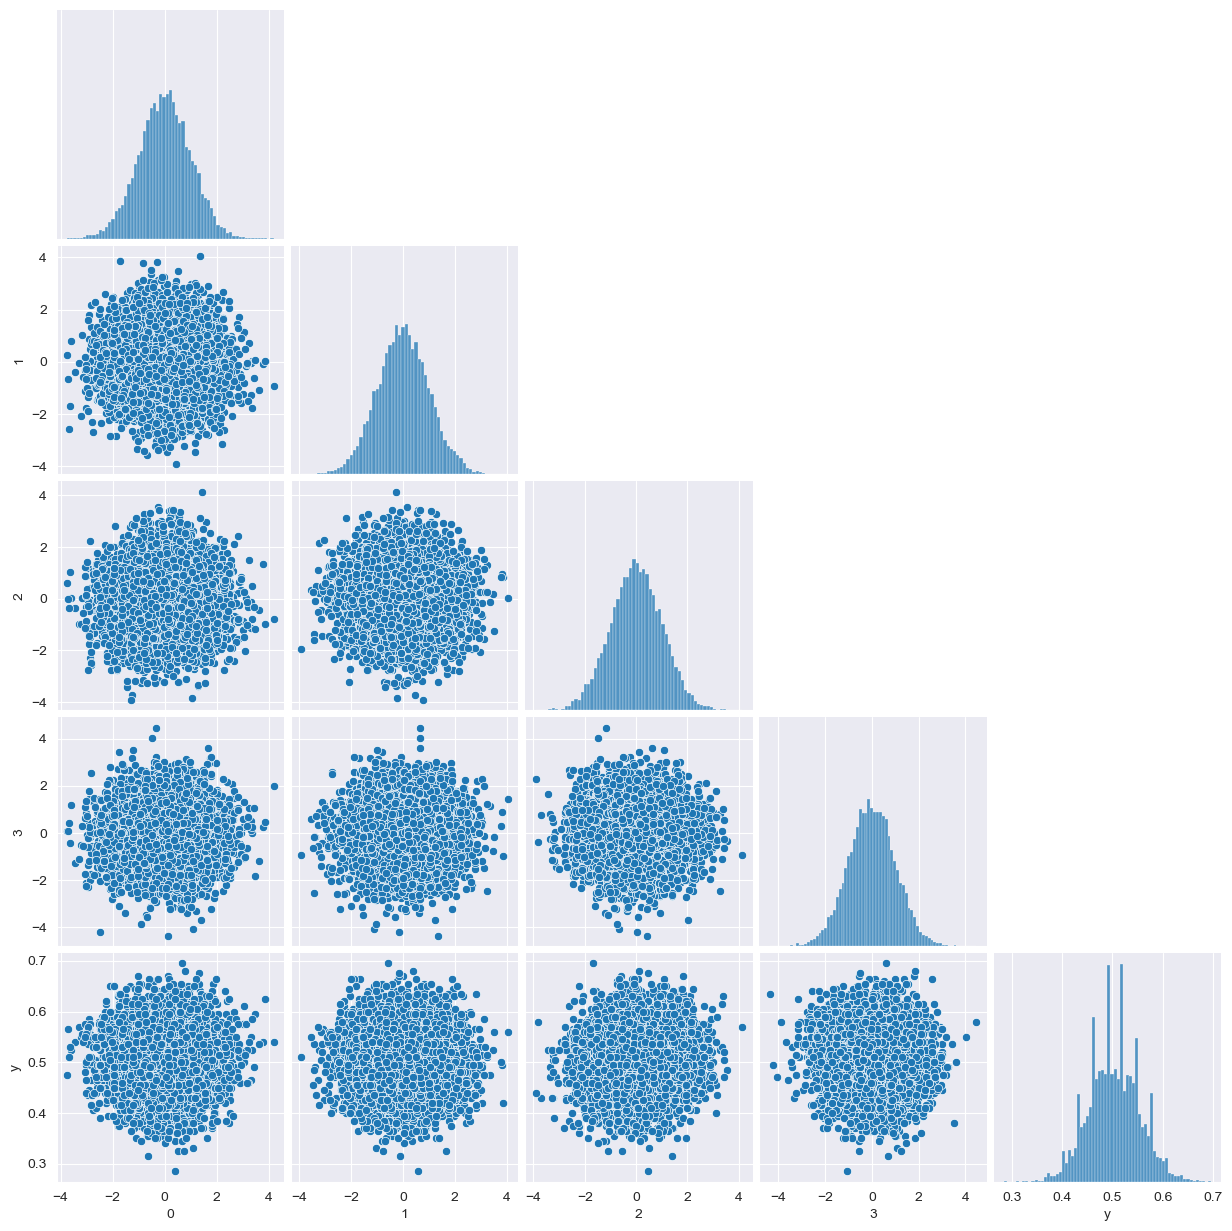

In [57]:
sns.pairplot(s, corner=True)

In [58]:
train_sc.shape

(1006161, 20)

In [59]:
from sklearn.linear_model import LassoCV

lcv = LassoCV(cv=5, max_iter=100, n_jobs=-1, verbose=1, random_state=42)

lcv.fit(train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


LassoCV(cv=5, max_iter=100, n_jobs=-1, random_state=42, verbose=1)

In [60]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

rcv = RidgeCV(alphas=np.arange(0.01,1,.01), cv=5)

rcv.fit(train_sc, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=5)

In [61]:
lcv.alpha_

9.720506100556117e-06

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)

gcv = GridSearchCV(lr, param_grid={}, cv=10)
gcv.fit(train_sc, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(n_jobs=-1), param_grid={})

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(train_sc, y_train)

GradientBoostingRegressor(random_state=42)

In [64]:
from sklearn.ensemble import AdaBoostRegressor

gcvada = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid={}, cv=5, n_jobs=-1)

gcvada.fit(train_sc, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={})

In [65]:
gcvada.best_estimator_

AdaBoostRegressor(random_state=42)

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

params= {'n_estimators': [100,200],
         'max_depth': [1,3],
         'max_leaf_nodes': [1,3, None],
         'ccp_alpha': [0,1,.3]}

rf2 = GridSearchCV(rf, param_grid=params, n_jobs=-1, cv=5)

rf2.fit(train_sc, y_train)

C:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ryan\anaconda3\Lib\site-packages\skle

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 1, 0.3], 'max_depth': [1, 3],
                         'max_leaf_nodes': [1, 3, None],
                         'n_estimators': [100, 200]})

In [67]:
rf2_pred = rf2.predict(val_sc)
gcvada_pred = gcvada.predict(val_sc)
lcv_pred = lcv.predict(val_sc)
lr_pred = gcv.predict(val_sc)
rcv_pred = rcv.predict(val_sc)
gbr_pred = gbr.predict(val_sc)

In [68]:
print(f'rf2 MSE: {mean_squared_error(rf2_pred, y_val)}',
    f'AdaBoost MSE: {mean_squared_error(gcvada_pred, y_val)}',
f'LassoCV MSE: {mean_squared_error(lcv_pred, y_val)}',
f'LinearRegression MSE: {mean_squared_error(lr_pred, y_val)}',
f'RCV MSE: {mean_squared_error(rcv_pred, y_val)}',
f'GBR MSE: {mean_squared_error(gbr_pred, y_val)}')

rf2 MSE: 0.00230667092426082 AdaBoost MSE: 0.0012327128437801828 LassoCV MSE: 0.00040225478316093183 LinearRegression MSE: 0.0004022490805972315 RCV MSE: 0.00040224908463265405 GBR MSE: 0.0010033729601368602


In [69]:
from sklearn.metrics import r2_score

print(f'rf2 MSE: {r2_score(y_val, rf2_pred)}'
      f'AdaBoost MSE: {r2_score(y_val, gcvada_pred)}'
      f'LassoCV Score: {r2_score(y_val, lcv_pred)}'
      f'Ridge Score: {r2_score(y_val, lr_pred)}'
      f'LinearRegression Score: {r2_score(y_val, rcv_pred)}',
      f'GBR Score: {r2_score(y_val, gbr_pred)}')

rf2 MSE: 0.112681520189722AdaBoost MSE: 0.525806271245149LassoCV Score: 0.8452626688372769Ridge Score: 0.8452648624705777LinearRegression Score: 0.8452648609182518 GBR Score: 0.6140275752785671


In [70]:
val_results = pd.DataFrame({'y_true':y_val,
                            'y_rf2_reg': y_val - rf2_pred,
                            'y_gcvada_reg':y_val-gcvada_pred,
                            'y_lassoCV_reg':y_val-lcv_pred,
                            'y_linearreg_reg':y_val-lr_pred,
                            'y_ridgecv_reg':y_val-rcv_pred,
                            'y_gboost_reg':y_val-gbr_pred})

val_results.head()

,y_true,y_rf2_reg,y_gcvada_reg,y_lassoCV_reg,y_linearreg_reg,y_ridgecv_reg,y_gboost_reg
0,0.560,0.055502,0.058855,0.025977,0.025946,0.025946,0.040691
1,0.575,0.076146,0.030694,-0.009875,-0.009959,-0.009959,0.033310
2,0.510,0.006962,-0.030375,-0.012578,-0.012597,-0.012597,-0.019365
3,0.530,0.014503,0.007425,-0.009347,-0.009382,-0.009382,0.001173
4,0.590,0.063357,0.003721,0.010883,0.010806,0.010806,0.043035


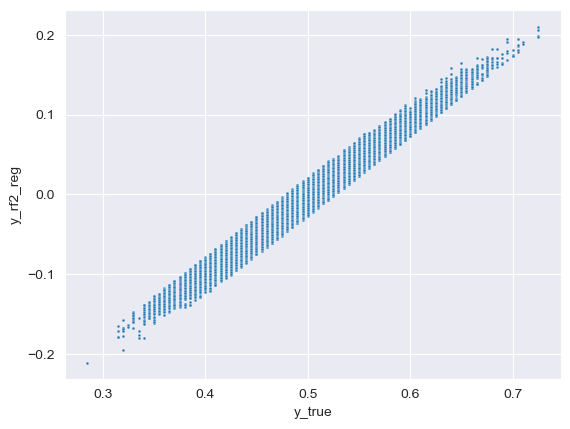

In [71]:
sns.scatterplot(val_results, x='y_true', y='y_rf2_reg', s=4);

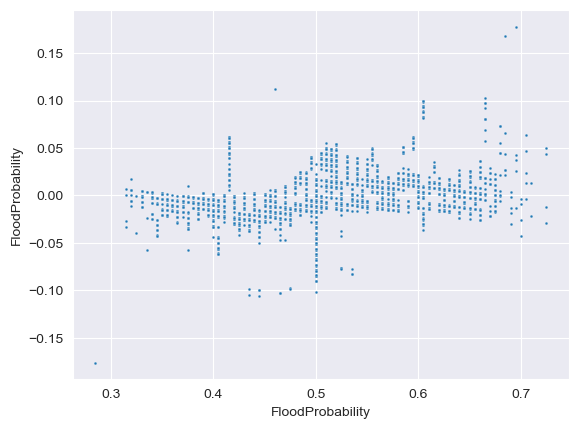

In [72]:
sns.scatterplot(x=y_val, y=y_val-lcv_pred, s=4);

In [73]:
train_sc

,AgriculturalPractices,ClimateChange,CoastalVulnerability,DamsQuality,Deforestation,DeterioratingInfrastructure,DrainageSystems,Encroachments,InadequatePlanning,IneffectiveDisasterPreparedness,Landslides,MonsoonIntensity,PoliticalFactors,PopulationScore,RiverManagement,Siltation,TopographyDrainage,Urbanization,Watersheds,WetlandLoss
0,0.994980,0.517917,-1.414490,0.021173,-1.434115,1.004689,0.025902,0.503419,-1.893548,0.026275,0.033029,-1.420715,0.507618,0.034728,0.021544,1.003360,-0.442805,-0.932050,-1.407048,0.991283
1,0.511280,1.489855,0.978878,-1.419415,-0.946548,1.489032,-0.456561,0.503419,-0.451857,0.507588,-1.410675,-0.448215,0.029155,-0.929347,-0.461116,-0.933239,0.034867,-1.892085,0.513977,0.024370
2,-0.456122,-0.454021,1.457552,-0.459023,1.003722,1.489032,-0.456561,0.503419,-0.451857,-0.936350,0.033029,-0.934465,-0.927770,-0.929347,0.986865,1.487509,-0.442805,-0.932050,0.033721,0.024370
3,0.511280,0.031948,0.021531,-0.939219,-0.946548,1.973374,-0.456561,0.023555,1.470397,0.507588,-1.410675,-0.934465,-0.449307,0.034728,-0.461116,0.035061,-1.398149,0.027985,0.033721,-0.942543
4,-0.456122,1.975824,-0.935816,-0.939219,1.491289,0.036005,0.990826,-0.456309,-0.932421,-0.936350,-1.410675,-0.448215,2.421468,0.034728,0.021544,0.035061,-0.442805,0.508003,-1.407048,0.507826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,-0.456122,0.031948,0.978878,-0.939219,-0.458980,0.520347,-1.421485,-1.895901,0.028706,0.026275,-0.929440,-0.448215,0.029155,-1.411384,0.021544,1.487509,0.990210,-0.452032,0.994234,-0.459087
1006157,-1.423523,1.003886,-0.935816,0.501369,0.028587,1.004689,0.990826,1.463148,-0.932421,-0.936350,0.995499,-0.934465,1.464543,-0.929347,0.504205,1.487509,-0.442805,0.027985,1.954747,-1.425999
1006158,-0.939822,-0.454021,0.021531,0.501369,-1.434115,0.036005,-0.456561,-0.936173,0.989834,-0.936350,-0.929440,0.038035,0.986080,-0.929347,-1.909096,1.487509,-0.442805,-0.932050,-0.446535,0.507826
1006159,0.027579,0.517917,0.500205,-0.939219,0.516154,0.036005,-0.939023,-0.936173,0.028706,0.026275,0.514264,0.524284,0.029155,-0.447309,-0.461116,-0.933239,2.423226,-0.932050,0.033721,-0.459087


In [74]:
lcv.fit(original_train_sc, y_original_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


LassoCV(cv=5, max_iter=100, n_jobs=-1, random_state=42, verbose=1)

In [75]:
test2 = test[feats]
sc_test2 = scale_preprocess(test2)

output = pd.DataFrame(gbr.predict(sc_test2))

In [76]:
sc_test2.columns

Index(['AgriculturalPractices', 'ClimateChange', 'CoastalVulnerability',
       'DamsQuality', 'Deforestation', 'DeterioratingInfrastructure',
       'DrainageSystems', 'Encroachments', 'InadequatePlanning',
       'IneffectiveDisasterPreparedness', 'Landslides', 'MonsoonIntensity',
       'PoliticalFactors', 'PopulationScore', 'RiverManagement', 'Siltation',
       'TopographyDrainage', 'Urbanization', 'Watersheds', 'WetlandLoss'],
      dtype='object')

In [77]:
train_sc.columns

Index(['AgriculturalPractices', 'ClimateChange', 'CoastalVulnerability',
       'DamsQuality', 'Deforestation', 'DeterioratingInfrastructure',
       'DrainageSystems', 'Encroachments', 'InadequatePlanning',
       'IneffectiveDisasterPreparedness', 'Landslides', 'MonsoonIntensity',
       'PoliticalFactors', 'PopulationScore', 'RiverManagement', 'Siltation',
       'TopographyDrainage', 'Urbanization', 'Watersheds', 'WetlandLoss'],
      dtype='object')

In [78]:
def output_cleaner(df):
    df = df.copy()
    df.index = test['id']
    df = df.rename(mapper={0: 'FloodProbability'}, axis=1)
    return df

output = output_cleaner(output)

In [79]:
output

,FloodProbability
id,
1117957,0.543202
1117958,0.483862
1117959,0.474211
1117960,0.489306
1117961,0.482590
...,...
1863257,0.500036
1863258,0.453641
1863259,0.558937


In [80]:
sample_sub.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


In [ ]:
output.to_csv('PlaygroundSubmission.csv')